**Load Data**

In [1]:
# Improt Libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer

# Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import itertools

import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras

# For Natural Language Processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# For Explainable AI
#import shap
#shap.initjs()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Load the dataset to a pandas DataFrame
df = pd.read_csv('/content/Data.csv', encoding = "ISO-8859-1")

In [3]:
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
# Split the dataset
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

**Data Pre-processing**

In [5]:
# Removing punctuations
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

In [6]:
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [7]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [8]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

train['headlines'] = headlines
train_headlines = headlines

<ipython-input-8-81dee318021a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['headlines'] = headlines


In [9]:
selected_categories = ['headlines']

**Word Embedding - Using Count-Vectorizer **

In [10]:
# Implement BAG OF WORDS
countvector = CountVectorizer(ngram_range=(2,2))
train_dataset_cv = countvector.fit_transform(headlines)

**Random Forest**

In [11]:
# implement RandomForest Classifier
rf=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(train_dataset_cv,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

**Multinomial Naive Bayes**

In [12]:
# implement Multinomial Naive Bayes
nb=MultinomialNB()
nb.fit(train_dataset_cv,train['Label'])

MultinomialNB()

**Logestic Regression**

In [13]:
# implement Logestic Regression
lr=LogisticRegression()
lr.fit(train_dataset_cv,train['Label'])

LogisticRegression()

**K-Nearest Neighbor**

In [14]:
# implement K-Nearest Neighbor
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(train_dataset_cv,train['Label'])

KNeighborsClassifier()

**Support vector classifier**

In [15]:
# implement Support vector classifier
svm = SVC(kernel='linear', random_state=0)
svm.fit(train_dataset_cv,train['Label'])

SVC(kernel='linear', random_state=0)

**Evaluation**

In [16]:
# Transform Test dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_headlines = test_transform
test_dataset_cv = countvector.transform(test_transform)

In [17]:
# Prediciton RandomForest Classifier
predictions_rf_cv = rf.predict(test_dataset_cv)

In [18]:
# Prediciton Multinomial Naive Bayes
predictions_nb_cv = nb.predict(test_dataset_cv)

In [19]:
# Prediciton Logestic Regression
predictions_lr_cv = lr.predict(test_dataset_cv)

In [20]:
# Prediciton K-Nearest Neighbor
predictions_knn_cv = knn.predict(test_dataset_cv)

In [21]:
# Prediciton Support vector classifier
predictions_svm_cv = svm.predict(test_dataset_cv)

In [22]:
# CV-RF
matrix_rf_cv=confusion_matrix(test['Label'],predictions_rf_cv)
print(matrix_rf_cv)
score_rf_cv=accuracy_score(test['Label'],predictions_rf_cv)
print(score_rf_cv)
report_rf_cv=classification_report(test['Label'],predictions_rf_cv)
print(report_rf_cv)

[[142  44]
 [  7 185]]
0.8650793650793651
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       186
           1       0.81      0.96      0.88       192

    accuracy                           0.87       378
   macro avg       0.88      0.86      0.86       378
weighted avg       0.88      0.87      0.86       378



In [23]:
# CV-NB
matrix_nb_cv=confusion_matrix(test['Label'],predictions_nb_cv)
print(matrix_nb_cv)
score_nb_cv=accuracy_score(test['Label'],predictions_nb_cv)
print(score_nb_cv)
report_nb_cv=classification_report(test['Label'],predictions_nb_cv)
print(report_nb_cv)

[[138  48]
 [ 10 182]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



In [24]:
# CV-LR
matrix_lr_cv=confusion_matrix(test['Label'],predictions_lr_cv)
print(matrix_lr_cv)
score_lr_cv=accuracy_score(test['Label'],predictions_lr_cv)
print(score_lr_cv)
report_lr_cv=classification_report(test['Label'],predictions_lr_cv)
print(report_lr_cv)

[[159  27]
 [ 27 165]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       186
           1       0.86      0.86      0.86       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378



In [25]:
# CV-KNN
matrix_knn_cv=confusion_matrix(test['Label'],predictions_knn_cv)
print(matrix_knn_cv)
score_knn_cv=accuracy_score(test['Label'],predictions_knn_cv)
print(score_knn_cv)
report_knn_cv=classification_report(test['Label'],predictions_knn_cv)
print(report_knn_cv)

[[ 18 168]
 [  0 192]]
0.5555555555555556
              precision    recall  f1-score   support

           0       1.00      0.10      0.18       186
           1       0.53      1.00      0.70       192

    accuracy                           0.56       378
   macro avg       0.77      0.55      0.44       378
weighted avg       0.76      0.56      0.44       378



In [26]:
# CV-SVM
matrix_svm_cv=confusion_matrix(test['Label'],predictions_svm_cv)
print(matrix_svm_cv)
score_svm_cv=accuracy_score(test['Label'],predictions_svm_cv)
print(score_svm_cv)
report_svm_cv=classification_report(test['Label'],predictions_svm_cv)
print(report_svm_cv)

[[160  26]
 [ 32 160]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       186
           1       0.86      0.83      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



In [27]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):

  # Tokenizing the news-title by words
  words = train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [28]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):

  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [29]:
down_words = []
for i in list(train['Label'][train['Label']==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(train['Label'][train['Label']==1].index):
  up_words.append(train_corpus[i])

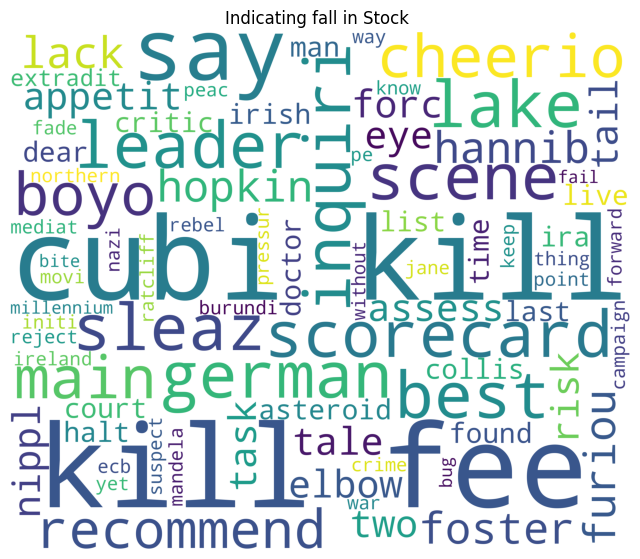

In [30]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Indicating fall in Stock ")
plt.show()

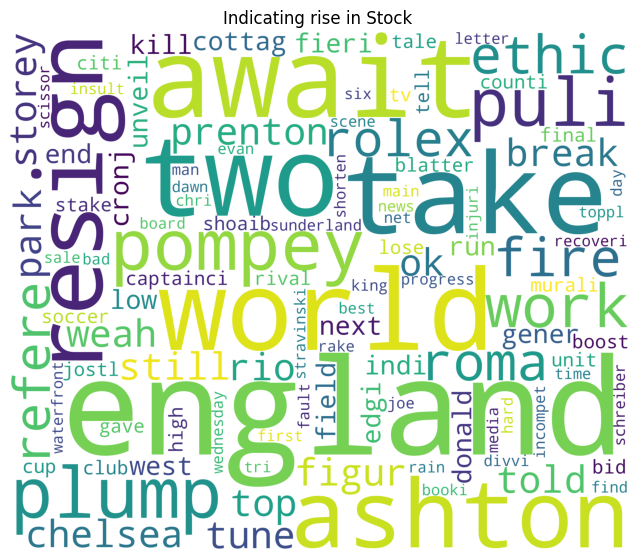

In [31]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Indicating rise in Stock ")
plt.show()

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


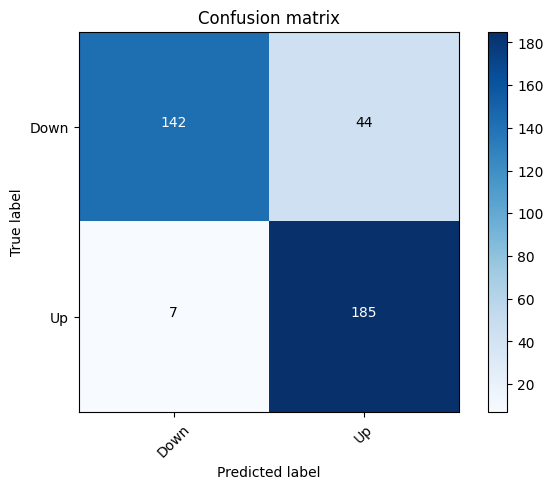

In [33]:
# Plot Confusion_Matrix RandomForest Classifier
plot_confusion_matrix(matrix_rf_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


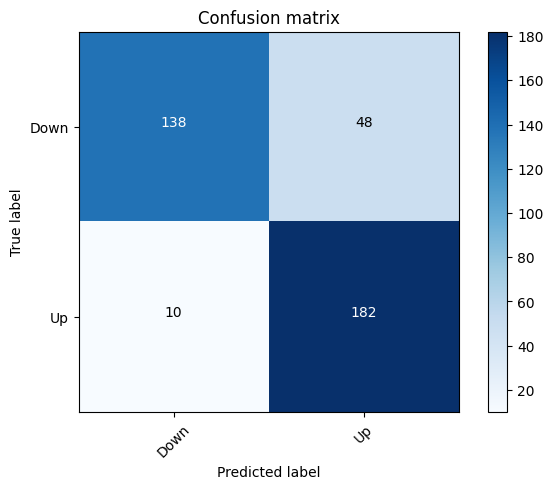

In [34]:
# Plot Confusion_Matrix Multinomial Naive Bayes
plot_confusion_matrix(matrix_nb_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


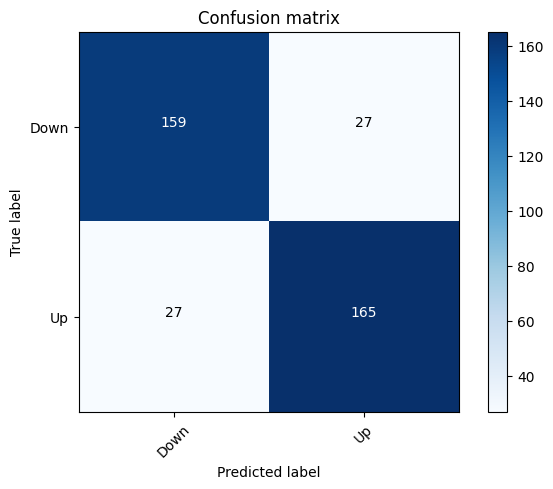

In [35]:
# Plot Confusion_Matrix Logestic Regression
plot_confusion_matrix(matrix_lr_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


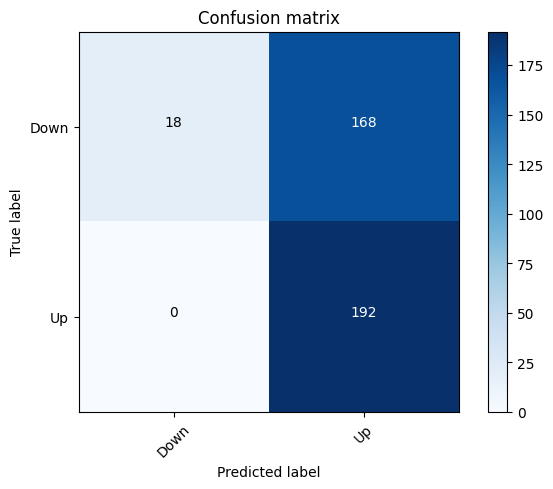

In [36]:
# Plot Confusion_Matrix K-Nearest Neighbor
plot_confusion_matrix(matrix_knn_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


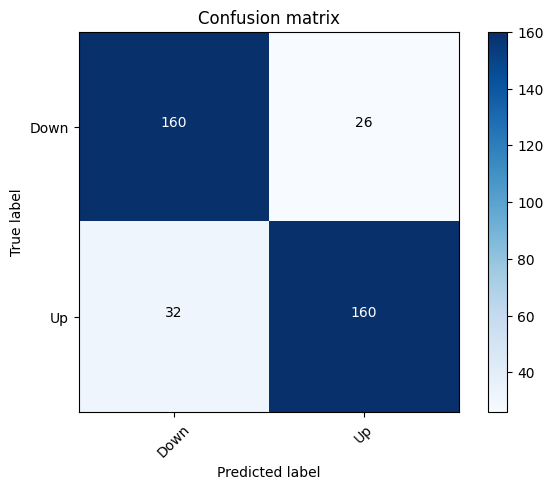

In [37]:
# Plot Confusion_Matrix Support vector classifier
plot_confusion_matrix(matrix_svm_cv, classes=['Down', 'Up'])